# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

# QUESTION 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

df = pd.read_csv('data/human_body_temperature.csv')
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


In [6]:
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

In [4]:
mean=np.mean(df['temperature'])
std = np.std(df['temperature'])
print('Mean: ' + str(mean))
print('STD: ' + str(std))

Mean: 98.24923076923078
STD: 0.7303577789050377


In [5]:
sample=np.random.normal(mean,std, size=10000)
print(sample)
print(np.mean(sample))

[98.79078791 97.01171735 97.55216849 ... 98.86690195 98.77991316
 96.80885794]
98.24907497365803


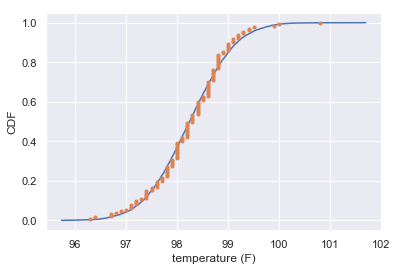

In [7]:
x,y=ecdf(df['temperature'])
x_theor, y_theor = ecdf(sample)
_=plt.plot(x_theor,y_theor)
_=plt.plot(x, y, marker='.', linestyle='none')
_=plt.xlabel('temperature (F)')
_=plt.ylabel('CDF')

plt.show()

#appears to be approximately normally distributed

# QUESTION 2

In [10]:
print('Sample Size: ' + str(len(df['temperature'])))

Sample Size: 130


In [ ]:
#There are 130 samples, the samples are independent of eachoter

# QUESTION 3

Is the true population mean really 98.6 degrees F?

Null Hypothesis: True population mean is 98.6F
Alt Hypotheis: True population mean is not 98.6F

First, try a bootstrap hypothesis test.
Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
Now try using the other test. How is the result be different? Why?

In [11]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    bs_replicates=np.empty(size)
    for i in range(size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func)
    return bs_replicates

def diff_from_pop(data, pop_mean=98.6):
    return np.mean(data) - pop_mean


#Shifting the data so that mean is the same as pop mean
temp = df['temperature'] 
pop_mean= 98.6
temp_shift = temp - np.mean(temp) + pop_mean

diff_obs=diff_from_pop(temp)
print(diff_obs)

In [13]:
bs_replicates = draw_bs_reps(temp_shift, diff_from_pop, 10000)

In [14]:
print(bs_replicates)
p_value=np.sum(bs_replicates<=diff_obs)/10000
print('p-value: '+ str(p_value)) #reject null hypothesis

[ 0.04307692  0.05153846 -0.06461538 ... -0.00846154  0.09538462
  0.04615385]
p-value: 0.0


In [32]:
#It is a one sample test since you are comparing to a set population mean and you do not know the population standard deviation

In [31]:
from scipy import stats
pval = stats.ttest_1samp(temp,pop_mean)
print('p-value: ' + str(round(pval.pvalue,3)))

p-value: 0.0


In [ ]:
#t-test with p-val near 0, so reject H0

# QUESTION 4

Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡 and  𝑧  statistic?

In [55]:
np.random.seed(42) #seed
small_sample= np.random.choice(temp,10) 
p_val = stats.ttest_1samp(small_sample,pop_mean)
print('p-value: ' + str(round(p_val.pvalue,3)))

p-value: 0.013


In [54]:
#in this case you would reject the null hypothesis, the p-val will vary greatly given the small sample size

AttributeError: module 'scipy.stats' has no attribute 'ztest_1samp'

# QUESTION 5

At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [148]:
#def bootstrap_replicate_1d(data, func):
#    return func(np.random.choice(data, size=len(data)))

#def draw_bs_reps(data, func, size=1):
#    bs_replicates=np.empty(size)
#    for i in range(size):
#        bs_replicates[i]=bootstrap_replicate_1d(data,func)
#    return bs_replicates

bootstrap_replicate_1d(temp,np.mean)
x=draw_bs_reps(temp, np.mean, 10000)
conf_int = np.percentile(x,[2.5,97.5])
print('2.5%: ' + str(round(conf_int[0],3)))
print('97.5%: '+str(round(conf_int[1],3)))
moe = 1.96*np.std(x)
print('Margin of Error: ' + str(round(moe,3)))
print('Mean: ' + str(round(np.mean(x),3)))
#print(str(np.mean(x)+moe))
#print(str(np.mean(x)-moe))

2.5%: 98.124
97.5%: 98.379
Margin of Error: 0.127
Mean: 98.249


In [125]:
#normal range would be about 98.12 F to 98.376 F, outliers would be outside this

In [150]:
freq_moe = 1.96 * np.std(temp)/np.sqrt(len(temp))
print('Margin of Error: ' + str(round(freq_moe,3)))
print('2.5%: ' + str(round(np.mean(temp)-freq_moe,3)))
print('97.5%: ' + str(round(np.mean(temp)+freq_moe,3)))


Margin of Error: 0.126
2.5%: 98.124
97.5%: 98.375


# QUESTION 6

Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [179]:
#print(df.head())
M = df[df.gender=='M']
F = df[df.gender=='F']
#H0 is that there is no difference in temp
#Ha is that there is a difference
p_value = stats.ttest_ind(M.temperature,F.temperature)
print('P-Value: ' + str(round(p_value.pvalue,3)))
print('Male Mean: ' + str(round(np.mean(M.temperature),3)))
print('Female Mean: ' + str(round(np.mean(F.temperature),3)))

P-Value: 0.024
Male Mean: 98.105
Female Mean: 98.394


In [ ]:
#you would reject the H0 that there is no difference in temp between Male and Females